This notebook has been prepared by [Mohannad Elhamod](https://wordpress.cs.vt.edu/elhamod/) and uses code from:
1. https://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn 
2. https://colab.research.google.com/github/mlittmancs/great_courses_ml/blob/master/L23.ipynb 
3. https://colab.research.google.com/github/mlittmancs/great_courses_ml/blob/master/L25.ipynb

In this notebook, we use machine learning to find the best fitting polynomials to fit some points generated from a sinusoidal (with noise). 

We plot the training points in blue and the test set line in green.


In [42]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CS4664')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


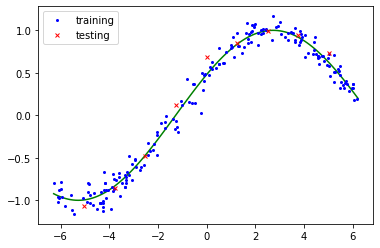

In [43]:
import numpy as np

from plot_aux import plot_aux

ntestpoints = 10
ntrainpoints = 200

# Sin data params
b = 0.5 # offset
w = np.pi/8 # frequency

# test data params
xfrom = -2*np.pi
xto = 2*np.pi

# noise magnitude
noise_mag = 0.1
# noise_mag = 0

# Our target function
def testfunction(x):
  return np.sin(w*x + b)
  # return x + 2*x*x -3*x*x*x

# testxs is the x positions sampled for the smooth function
testxs = np.array([xfrom + i/ntestpoints*(xto-xfrom) for i in range(1,ntestpoints)]).reshape(-1,1)

# The test data
testlabs = testfunction(testxs)+ noise_mag * np.random.normal(size=testxs.shape)

# a few training coordinates
trainxs = (xto-xfrom) * np.random.rand(ntrainpoints, 1) +xfrom
trainlabs = testfunction(trainxs) + noise_mag * np.random.normal(size=trainxs.shape)

# Here's what it looks like. The points are the training data
# The line is the test data.

import matplotlib.pyplot as plt
# generating function
x = np.arange(xfrom,xto,0.1)   # start,stop,step
y = testfunction(x)
plt.plot(x,y,color="green")
plt.plot(trainxs,trainlabs,'o',color="blue", markersize=2, label='training')
plt.plot(testxs,testlabs,'x', color='red', markersize=4,label='testing')
plt.legend()



We will use polynomial regression (i.e. polynomial features with linear regression).

For example:

y = $a_0$ + $a_1$x + $a_2$x$^2$ + $a_3$x$^3$ + $a_4$x$^4$

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

polynomial_degree = 5

poly = PolynomialFeatures(degree=polynomial_degree)
trainxs_poly_features = poly.fit_transform(trainxs)

clf = linear_model.LinearRegression()
clf.fit(trainxs_poly_features, trainlabs)

LinearRegression()

Let's see the coefficients!

In [45]:
clf.coef_

array([[ 0.00000000e+00,  3.51140952e-01, -3.70345707e-02,
        -9.34952397e-03,  4.08423923e-04,  6.74197080e-05]])

Let's plot the data and the learned function

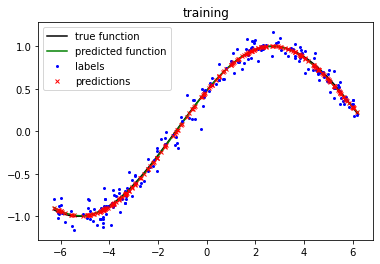

In [46]:
x = np.arange(1*xfrom,1*xto,0.1)   # start,stop,step
y = testfunction(x)

# predictions = clf.predict(poly.fit_transform(testxs))
# plot_aux(x, y, clf, poly, testxs, testlabs, predictions, "testing")

predictions = clf.predict(poly.fit_transform(trainxs))
plot_aux(x, y, clf, poly, trainxs, trainlabs, predictions, "training")


Now let's try and see how the degree of the polynomial affect overfitting and underfitting

This link might be useful: https://stackoverflow.com/questions/47717818/train-score-diminishes-after-polynomial-regression-degree-increases 

100%|██████████| 25/25 [00:00<00:00, 342.10it/s]


degree 0 test_mse: 0.598929030459255 train_mse: 0.563619857163183
degree 1 test_mse: 0.13686230013951564 train_mse: 0.15163818865412576
degree 2 test_mse: 0.043640226288799516 train_mse: 0.06963447096838699
degree 3 test_mse: 0.011823554152274755 train_mse: 0.012089093872645123
degree 4 test_mse: 0.007243348602985516 train_mse: 0.009800611277907403
degree 5 test_mse: 0.009245450268426365 train_mse: 0.00919537391372718
degree 6 test_mse: 0.009878118983897378 train_mse: 0.009135392998474205
degree 7 test_mse: 0.00994217030804112 train_mse: 0.0091119550980558
degree 8 test_mse: 0.01017109576990881 train_mse: 0.009100930476848951
degree 9 test_mse: 0.010133480718981883 train_mse: 0.00908960947762095
degree 10 test_mse: 0.010338585100667989 train_mse: 0.009049508429162663
degree 11 test_mse: 0.01062157506898704 train_mse: 0.009035514181315586
degree 12 test_mse: 0.010640422211977443 train_mse: 0.009034965914396138
degree 13 test_mse: 0.010638409566456737 train_mse: 0.009034652864177485
degr

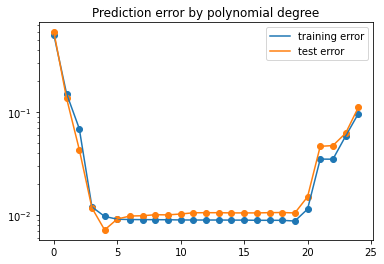

In [47]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

max_poly_degree = 25

mse_train = []
mse_test = []
for i in tqdm(range(max_poly_degree)):
  poly = PolynomialFeatures(degree=i)
  trainxs_poly_features = poly.fit_transform(trainxs)

  # train
  clf = linear_model.LinearRegression()
  clf.fit(trainxs_poly_features, trainlabs)

  # test
  train_preds = clf.predict(trainxs_poly_features)
  test_preds = clf.predict(poly.fit_transform(testxs))

  # claculate errors
  mse_test_i = mean_squared_error(testlabs, test_preds)
  mse_test.append(mse_test_i)
  mse_train_i = mean_squared_error(trainlabs, train_preds)
  mse_train.append(mse_train_i)
  print('degree', i, "test_mse:", mse_test_i, "train_mse:", mse_train_i)
  
plt.scatter(range(max_poly_degree), mse_train)
plt.plot(range(max_poly_degree), mse_train, label = 'training error')
plt.scatter(range(max_poly_degree), mse_test)
plt.plot(range(max_poly_degree), mse_test, label = 'test error')
plt.legend()
plt.yscale("log")
plt.title('Prediction error by polynomial degree')
plt.show()

So, is a the learned model of degree = 3 a good approximation of a sinusoidal function?

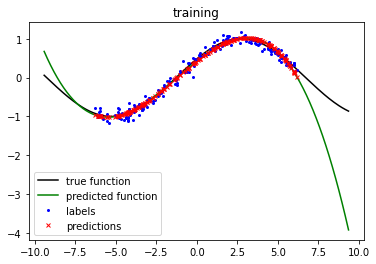

In [48]:
x = np.arange(1.5*xfrom,1.5*xto,0.1)   # start,stop,step
y = testfunction(x)

poly = PolynomialFeatures(degree=3)
trainxs_poly_features = poly.fit_transform(trainxs)

# train
clf = linear_model.LinearRegression()
clf.fit(trainxs_poly_features, trainlabs)

# predictions = clf.predict(poly.fit_transform(testxs))
# plot_aux(x, y, clf, poly, testxs, testlabs, predictions, "testing")

predictions = clf.predict(poly.fit_transform(trainxs))
plot_aux(x, y, clf, poly, trainxs, trainlabs, predictions, "training")

Let's try regression trees.

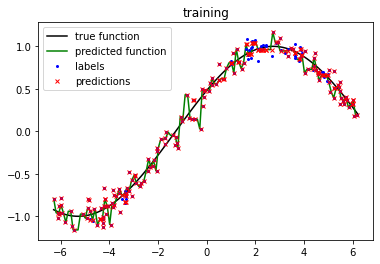

In [49]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

clf = DecisionTreeRegressor(max_depth=10)
clf.fit(trainxs, trainlabs)


predictions = clf.predict(testxs)
x = np.arange(1*xfrom,1*xto,0.1)   # start,stop,step
y = testfunction(x)
# plot_aux(x, y, clf, None, testxs, testlabs, predictions, "testing")

predictions = clf.predict(trainxs)

plot_aux(x, y, clf, None, trainxs, trainlabs, predictions, "training")

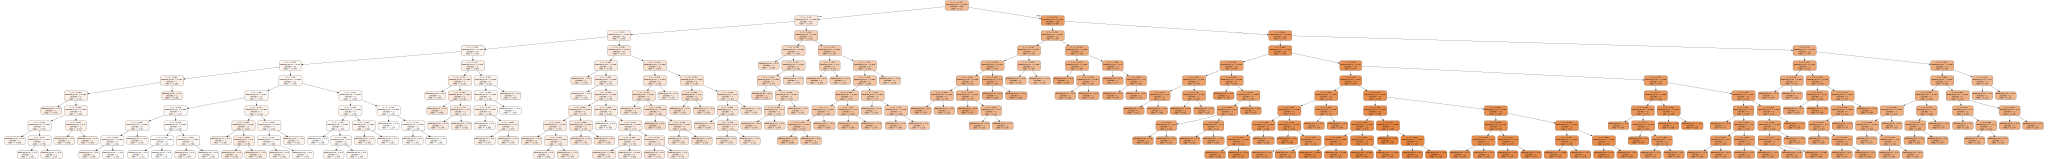

In [50]:
import graphviz 
dot_data = export_graphviz(clf, feature_names=["x"],
                      filled=True, rounded=True) 
graph = graphviz.Source(dot_data)	
graph	

What's the effect of the depth of the tree?

100%|██████████| 19/19 [00:00<00:00, 274.58it/s]


max_depth 1 test_err: 0.06268881519472422 train_err: 0.041207305758790023
max_depth 2 test_err: 0.028572147182691354 train_err: 0.016979569426742024
max_depth 3 test_err: 0.01834012529127827 train_err: 0.011501930083172325
max_depth 4 test_err: 0.013090660273519968 train_err: 0.006559869502726698
max_depth 5 test_err: 0.015166389288393986 train_err: 0.00444388176753544
max_depth 6 test_err: 0.013283376224987284 train_err: 0.00287383287984863
max_depth 7 test_err: 0.010459466774753389 train_err: 0.0017803199982919316
max_depth 8 test_err: 0.01234867826732059 train_err: 0.0009574099158829671
max_depth 9 test_err: 0.013441004098194641 train_err: 0.0004406672958531067
max_depth 10 test_err: 0.013700341438289302 train_err: 0.00017686218253474016
max_depth 11 test_err: 0.013688171452364534 train_err: 2.2307115054573892e-05
max_depth 12 test_err: 0.013732941923273626 train_err: 7.633479783918867e-06
max_depth 13 test_err: 0.01375417636129011 train_err: 9.955609555363923e-08
max_depth 14 test_

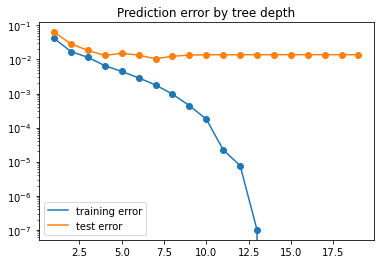

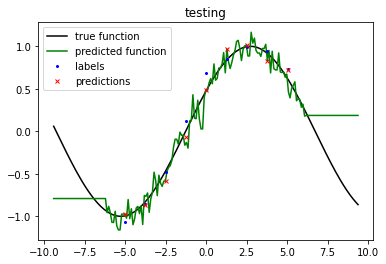

In [51]:
max_depth=20


mse_train = []
mse_test = []
for i in tqdm(range(1, max_depth, 1)):

  clf = DecisionTreeRegressor(max_depth=i+1)
  clf.fit(trainxs, trainlabs)

  train_preds = clf.predict(trainxs)
  test_preds = clf.predict(testxs)

  mse_test_i = mean_squared_error(testlabs, test_preds)
  mse_test.append(mse_test_i)
  mse_train_i = mean_squared_error(trainlabs, train_preds)
  mse_train.append(mse_train_i)
  print('max_depth', i, "test_err:", mse_test_i, "train_err:", mse_train_i)
  
plt.scatter(range(1, max_depth, 1), mse_train)
plt.plot(range(1, max_depth, 1), mse_train, label = 'training error')
plt.scatter(range(1, max_depth, 1), mse_test)
plt.plot(range(1, max_depth, 1), mse_test, label = 'test error')
plt.legend()
plt.yscale("log")
plt.title('Prediction error by tree depth')
plt.show()

x = np.arange(1.5*xfrom,1.5*xto,0.1)
y = testfunction(x)
predictions = clf.predict(testxs)
plot_aux(x, y, clf, None, testxs, testlabs, predictions, "testing")
